In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           5.08e-88
Time:                        14:20:54   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

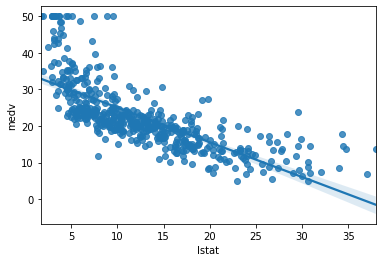

In [20]:
# You will need to change this for your environment
DATA_ROOT = '/Users/aidenbingham/ALL CSV FILES - 2nd Edition/'
df = pd.read_csv(DATA_ROOT + 'Boston.csv', index_col=0)
df.head()

# We will use the Boston house data from the text book in part of this lab. Here is a regression
# of median house price against proportion of residents in a neighborhood in a lower economic demographic.
lm = sm.OLS.from_formula('medv ~ lstat', df)
result = lm.fit()

print(result.summary())

sns.regplot('lstat', 'medv', df)
plt.show()

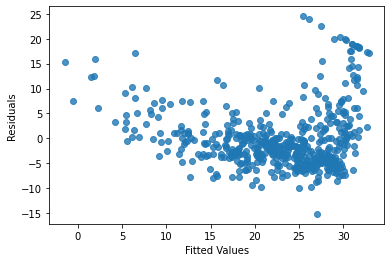

In [21]:
# Plot residuals against fitted values
# You can get the fitted values and the residuals as properties of the regression, among other properties

fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)
plt.show()

# Multiple Linear Regression

In [22]:

# Add one other feature to compare the regression fit
m1 = sm.OLS.from_formula('medv ~ lstat + age', df)
r1 = m1.fit()
print(r1.summary())
plt.show()

# We can use an ANOVA to test the null hypothesis that the regression using the squared term
# does not improve the fit. For example, this ANOVA shows an F score of 135
# and a p-value of virtually zero, indicating an improved fit
print(sm.stats.anova_lm(result, r1))

# The anova table shows F statistics and p-values for the null hypotheses that the
# model with age as well as lstat fits the data as well as the first model, which
# can be rejected with a p-value of 0.005



                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           2.98e-88
Time:                        14:20:56   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [23]:
# Add all the other features:
# This syntax lets us easily reference all the other columns save
m2 = sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv'])), df)
r2 = m2.fit()
print(r2.summary())

print(sm.stats.anova_lm(r1, r2))

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          2.23e-133
Time:                        14:20:56   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.0

In [24]:
df.columns.difference(['medv'])

Index(['age', 'chas', 'crim', 'dis', 'indus', 'lstat', 'nox', 'ptratio', 'rad',
       'rm', 'tax', 'zn'],
      dtype='object')

In [25]:
print(sm.stats.anova_lm(r1, r2))

   df_resid           ssr  df_diff    ss_diff          F        Pr(>F)
0     503.0  19168.128609      0.0        NaN        NaN           NaN
1     493.0  11349.418808     10.0  7818.7098  33.963183  3.565625e-50


In [26]:
df[['age', 'chas', 'crim', 'dis', 'indus', 'lstat', 'nox', 'ptratio', 'rad',
       'rm', 'tax', 'zn']]

,age,chas,crim,dis,indus,lstat,nox,ptratio,rad,rm,tax,zn
1,65.2,0,0.00632,4.0900,2.31,4.98,0.538,15.3,1,6.575,296,18.0
2,78.9,0,0.02731,4.9671,7.07,9.14,0.469,17.8,2,6.421,242,0.0
3,61.1,0,0.02729,4.9671,7.07,4.03,0.469,17.8,2,7.185,242,0.0
4,45.8,0,0.03237,6.0622,2.18,2.94,0.458,18.7,3,6.998,222,0.0
5,54.2,0,0.06905,6.0622,2.18,5.33,0.458,18.7,3,7.147,222,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
502,69.1,0,0.06263,2.4786,11.93,9.67,0.573,21.0,1,6.593,273,0.0
503,76.7,0,0.04527,2.2875,11.93,9.08,0.573,21.0,1,6.120,273,0.0
504,91.0,0,0.06076,2.1675,11.93,5.64,0.573,21.0,1,6.976,273,0.0
505,89.3,0,0.10959,2.3889,11.93,6.48,0.573,21.0,1,6.794,273,0.0


# Questions 1-3

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     119.6
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          1.50e-131
Time:                        14:20:59   Log-Likelihood:                -1511.8
No. Observations:                 506   AIC:                             3048.
Df Residuals:                     494   BIC:                             3098.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.0410      4.996      8.215      0.0

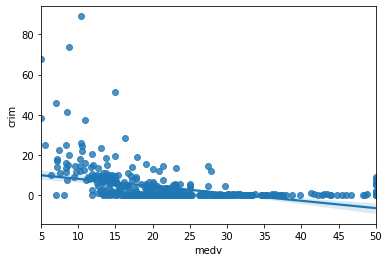

   df_resid           ssr  df_diff    ss_diff          F        Pr(>F)
0     503.0  19168.128609      0.0        NaN        NaN           NaN
1     493.0  11349.418808     10.0  7818.7098  33.963183  3.565625e-50


In [27]:
print(sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv', 'crim'])), df).fit().summary())

sns.regplot('medv', 'crim', df)
plt.show()
print(sm.stats.anova_lm(r1, r2))
# Insert your own model here or edit above

Question 1: can we reject the null hypothesis that the model for median value (medv)
with all the fields fits the data no better than the model with only lstat and age? Why?

Based on the ANOVA test of r1 and r2, we reject the null hypothesis that the model for median value with all the fields fits the data no better than the model with only lstat and age. 


Question 2: from the result of the second regression, which predictor variables would you
drop from the regression? You can drop variables by adding them to the list in the
difference call, e.g. to drop crime, use 'df.columns.difference(['medv', 'crim'])'
(Although this is not to imply that crime should be dropped from the regression):

The predictor variables of indus and age could be dropped from the regression due to having high p values. The probabiility of these observations being true are within the bounds of a true null hypothesis. 

Question 3: After you drop these variables, what is the R-squared and how does it compare to the
full R-squared and that of the model with lstat and age?

Model with lstat and age had an R-squared value of 0.551.
Model with all variables had an R-squared value of 0.734.
The new model with all variables, except the dropped variables, had an R-squared value of 0.734.

In [28]:
print(sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv','age', 'indus'])), df).fit().summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          1.73e-135
Time:                        14:21:00   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4517      4.903      8.454      0.0

In [29]:
alist = ['a','b']
' '.join(alist)

'a b'

# Interaction terms


In [30]:
# You can include interaction terms in the regression formula with a '*'. For example,
# this regression includes lstat * age, and automatically includes both lstat and age.
print(sm.OLS.from_formula('medv ~ lstat*age', df).fit().summary())
plt.show()


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           4.86e-88
Time:                        14:21:01   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

# Question 4

Question 4: Based on the regression graph of medv regressed onto lstat in the second cell, above, would
you expect that including a squared term for lstat might be useful for the model? Why?

A squared term for lstat might be useful because the graph of medv regressed onto lstat is not linear and appears to be parabolic, showing the relationship between the two variables is nonlinear. A squared term for lstat will help increase the accuracy of the model. 


In [37]:
# You can also include functions of predictor variables. For example, this version
# includes a squared term for lstat
lm.fit2 = sm.OLS.from_formula('medv ~ lstat + np.square(lstat)', df).fit()
print(lm.fit2.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          1.56e-112
Time:                        14:22:02   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872  

In [32]:
print(sm.stats.anova_lm(result, lm.fit2))


   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


# Qualitative variables


In [33]:
# We turn now to a new data set from the text book, on number of car seats sold,
# which includes three qualitative variables.
# Recall you may need to modify this line to load the data on your setup:

df2 = pd.read_csv(DATA_ROOT + 'Carseats.csv')
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [34]:
# The regression defined with the from_formula call automatically converts the
# three categorical variables to dummy variables.

print(sm.OLS.from_formula('Sales ~  ' + "+".join(df2.columns.difference(['Sales'])), df2).fit().summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          1.60e-166
Time:                        14:21:05   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606    

# Question 5

Question 5: Why are there two variables for Shelving location included in the
regression? Which variables would you consider dropping from this regression?

The two variables are Education and population should be dropped from this regression, the two variables for shelving location are included as dummy variables because of collinearity.

In [35]:
# You can show the result of dropping the variables you suggest here (not scored)
print(sm.OLS.from_formula('Sales ~  ' + "+".join(df2.columns.difference(['Education', 'Population'])), df2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.106e+30
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:21:07   Log-Likelihood:                 12427.
No. Observations:                 400   AIC:                        -2.483e+04
Df Residuals:                     389   BIC:                        -2.479e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -1.11e-15   4